In [6]:
import pandas as pd
from faker import Factory
fake = Factory.create()
from random import randint
from operator import methodcaller
import matplotlib.pyplot as plt
import numpy as np
import math
import json

import matplotlib.mlab as mlab

In [7]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [8]:
#Temps depuis clickez pour commencer
#Moyenne de temps des clicks
#nb retour sur la page d'acceuil
#nb retour page precedente
#nb validation avec formulaire non conforme
#temps sans regarder l'ecran
#nbFois confusion detecté
rowSize=300
owners = pd.DataFrame(index=range(1,rowSize))
owners.index.name='id'
owners['label'] = owners.index.map(lambda x : randint(0, 1))
owners.head()

tmpCompetent = get_truncated_normal(mean=3, sd=2, low=0, upp=10)
tmpIncompetent = get_truncated_normal(mean=8, sd=2, low=0, upp=30)

nbRetourCompetent = get_truncated_normal(mean=0, sd=1, low=0, upp=3)
nbRetourIncompetent = get_truncated_normal(mean=10, sd=5, low=0, upp=20)

nbRetourPagePrecedenteCompetent = get_truncated_normal(mean=0, sd=2, low=0, upp=6)
nbRetourPagePrecedenteIncompetent = get_truncated_normal(mean=10, sd=5, low=0, upp=20)

for index, row in owners.iterrows():

    if row.label==0:
        chrono = randint(0, 60) + int(tmpCompetent.rvs())*60 #+ temps sans regarder ecran
        nbRetour = int(nbRetourCompetent.rvs())
        nbRetourPagePrecedente = int(nbRetourPagePrecedenteCompetent.rvs())
    else:
        chrono = randint(0, 60) + int(tmpIncompetent.rvs())*60
        nbRetour= int(nbRetourIncompetent.rvs())
        nbRetourPagePrecedente = int(nbRetourPagePrecedenteIncompetent.rvs())
        
        
    owners.set_value(index,'chrono',chrono)
    owners.set_value(index,'nbRetour',nbRetour)
    owners.set_value(index,'nbRetourPagePrecedente',nbRetourPagePrecedente)
owners.head()


C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,label,chrono,nbRetour,nbRetourPagePrecedente
id,,,,
1,1,303.0,7.0,12.0
2,0,71.0,1.0,0.0
3,1,223.0,12.0,16.0
4,1,347.0,8.0,11.0
5,0,365.0,0.0,2.0


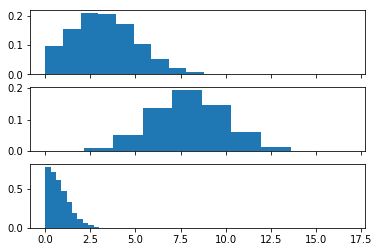

In [9]:
tmpCompetent = get_truncated_normal(mean=3, sd=2, low=0, upp=10)
tmpIncompetent = get_truncated_normal(mean=8, sd=2, low=0, upp=30)

nbRetourCompetent = get_truncated_normal(mean=0, sd=1, low=0, upp=3)


fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(tmpCompetent.rvs(10000), normed=True)
ax[1].hist(tmpIncompetent.rvs(10000), normed=True)
ax[2].hist(nbRetourCompetent.rvs(10000), normed=True)
plt.show()

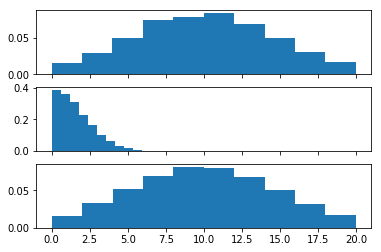

In [10]:
nbRetourIncompetent = get_truncated_normal(mean=10, sd=5, low=0, upp=20)

nbRetourPagePrecedenteCompetent = get_truncated_normal(mean=0, sd=2, low=0, upp=6)
nbRetourPagePrecedenteIncompetent = get_truncated_normal(mean=10, sd=5, low=0, upp=20)

fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(nbRetourIncompetent.rvs(10000), normed=True)
ax[1].hist(nbRetourPagePrecedenteCompetent.rvs(10000), normed=True)
ax[2].hist(nbRetourPagePrecedenteIncompetent.rvs(10000), normed=True)
plt.show()

In [28]:
data = owners.reset_index().to_json(orient='records')
print (data)
with open('echantillon.json', 'w') as outfile:
    json.dump(data, outfile)

[{"id":1,"label":1,"chrono":654.0,"nbRetour":11.0,"nbRetourPagePrecedente":1.0},{"id":2,"label":0,"chrono":174.0,"nbRetour":0.0,"nbRetourPagePrecedente":2.0},{"id":3,"label":1,"chrono":419.0,"nbRetour":8.0,"nbRetourPagePrecedente":13.0},{"id":4,"label":0,"chrono":67.0,"nbRetour":0.0,"nbRetourPagePrecedente":2.0},{"id":5,"label":0,"chrono":245.0,"nbRetour":0.0,"nbRetourPagePrecedente":1.0},{"id":6,"label":1,"chrono":435.0,"nbRetour":9.0,"nbRetourPagePrecedente":2.0},{"id":7,"label":0,"chrono":162.0,"nbRetour":0.0,"nbRetourPagePrecedente":4.0},{"id":8,"label":1,"chrono":540.0,"nbRetour":11.0,"nbRetourPagePrecedente":9.0},{"id":9,"label":1,"chrono":494.0,"nbRetour":2.0,"nbRetourPagePrecedente":7.0},{"id":10,"label":1,"chrono":640.0,"nbRetour":11.0,"nbRetourPagePrecedente":6.0},{"id":11,"label":0,"chrono":269.0,"nbRetour":0.0,"nbRetourPagePrecedente":1.0},{"id":12,"label":1,"chrono":621.0,"nbRetour":9.0,"nbRetourPagePrecedente":11.0},{"id":13,"label":0,"chrono":142.0,"nbRetour":0.0,"nbReto